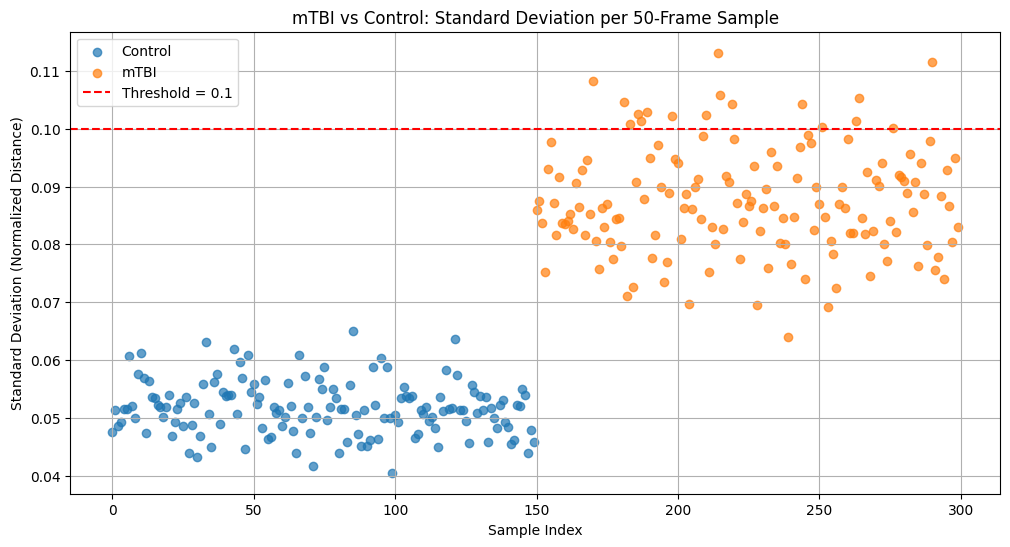

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

# Import functions from features.py
src_path = os.path.abspath(os.path.join("..", "src"))
if src_path not in sys.path:
    sys.path.append(src_path)

from features import (
    compute_inter_iris_distance,
    compute_average_diameter,
    normalise_distance,
    compute_time_series_std,
    flag_mTBI
)

def process_dataset(filepath, frames_per_sample=50, threshold=0.1):
    df = pd.read_csv(filepath)
    std_list = []

    for i in range(0, len(df), frames_per_sample):
        chunk = df.iloc[i:i+frames_per_sample]
        norm_distances = []

        for _, row in chunk.iterrows():
            left_mid = (row["left_mid_x"], row["left_mid_y"])
            right_mid = (row["right_mid_x"], row["right_mid_y"])
            left_inner = (row["left_inner_x"], row["left_inner_y"])
            left_outer = (row["left_outer_x"], row["left_outer_y"])
            right_inner = (row["right_inner_x"], row["right_inner_y"])
            right_outer = (row["right_outer_x"], row["right_outer_y"])

            inter = compute_inter_iris_distance(left_mid, right_mid)
            avg = compute_average_diameter(left_inner, left_outer, right_inner, right_outer)
            norm = normalise_distance(inter, avg)

            if pd.notna(norm):
                norm_distances.append(norm)

        std = compute_time_series_std(norm_distances)
        std_list.append(std)

    return std_list

# Run
control_std = process_dataset("data/raw/control_sample.csv")
mtbi_std = process_dataset("data/raw/mtbi_sample.csv")

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(range(len(control_std)), control_std, label="Control", alpha=0.7)
plt.scatter(range(len(control_std), len(control_std) + len(mtbi_std)), mtbi_std, label="mTBI", alpha=0.7)
plt.axhline(y=0.1, color='red', linestyle='--', label="Threshold = 0.1")
plt.xlabel("Sample Index")
plt.ylabel("Standard Deviation (Normalized Distance)")
plt.title("mTBI vs Control: Standard Deviation per 50-Frame Sample")
plt.legend()
plt.grid(True)
plt.show()